# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [41]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [16]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [18]:
# Criando a matriz de design utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, dinner e net_bill
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [19]:
# Verificando as variaveis de acordo com o modelo criado
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.64e-20
Time:                        01:26:04   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- podemos observar que o valor de p-value e maior que 5% nas variaveis sex, smoke e time tornando elas estatisticamente insignificantes.

In [36]:
# Remova as variáveis não significantes e utilizando a api do statsmodels
reg = smf.ols('tip ~ net_bill', data = tips).fit()

# separando o residuo da regressão e colocando em uma nova coluna
tips['res_tip'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.02e-23
Time:                        02:34:26   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

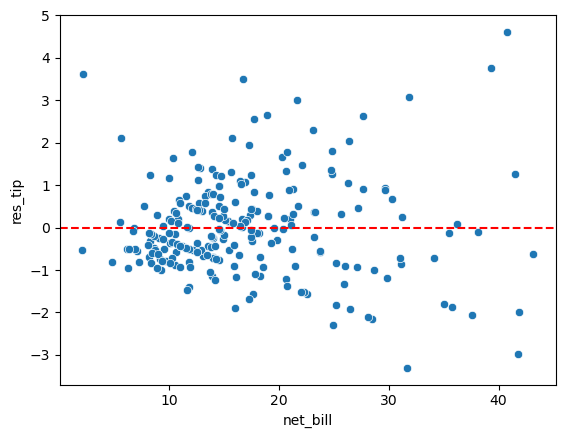

In [37]:
# observando o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
# transformando net_bill no log para verificar o melhor resultado
reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
tips['res_tip'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           4.40e-20
Time:                        02:35:04   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# transformando net_bill no Polinomio para verificar o melhor resultado
reg = smf.ols('tip ~ np.power(net_bill,2)', data = tips).fit()
tips['res_tip'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.47e-20
Time:                        02:08:14   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos observar que o melhor modelo e com o polinomio de net_bill pois possue o R² e Adj. R² ligeiramente melhor, AIC e BIC mais baixos oque sugere melhor ajuste, os residuos são mais proximos do correto que o modelo com o log.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [31]:
# Criando a matriz de design utilizando o Patsy, para um modelo em log de tip, explicada por sex, smoker, dinner e net_bill
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.21e-18
Time:                        02:14:37   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Removendo as variáveis não significantes 
reg = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
tips['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.60e-21
Time:                        02:17:20   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

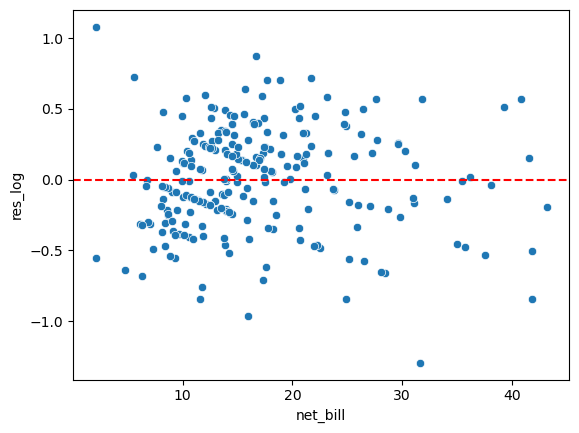

In [33]:
# observando o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [40]:
# transformando net_bill no log para verificar o melhor resultado
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.62e-22
Time:                        02:49:56   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# transformando net_bill no Polinomio para verificar o melhor resultado
reg = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data = tips).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           7.70e-17
Time:                        02:19:51   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7894      0.034     23.273      0.000       0.723       0.856
np.power(net_bill, 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Agora vemos que o melhor modelo e com o log de net_bill pois possue o R² e Adj. R² ligeiramente maior, AIC e BIC mais baixos oque sugere melhor ajuste, os residuos são mais proximos do correto que os outros modelo .

In [44]:
# calcule o R2 na escala de tip (sem o log)
reg = smf.ols('tip ~ np.power(net_bill,2)', data = tips).fit() # modelo final sem o log
# primeiro definindo o predito
tips['pred'] = reg.fittedvalues
# calcular o R² com a função do scikit-learn
r2 = r2_score(tips['tip'], tips['pred'])
r2

0.3007320013293898

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [45]:
# importando o Data frame
prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [46]:
# Ajuste um modelo de regressão linear simples para explicar renda
reg = smf.ols ('renda ~ tempo_emprego', data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:14:25   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

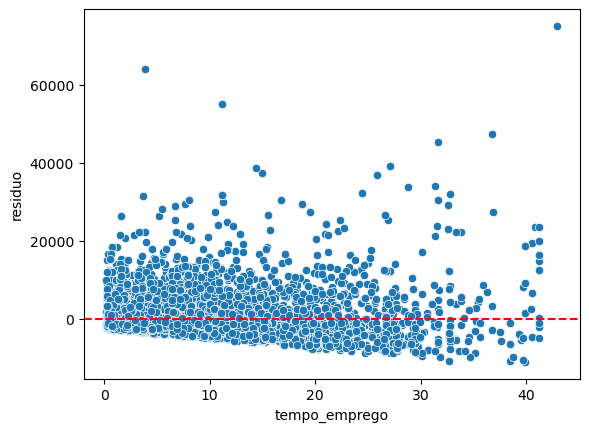

In [47]:
# análise de resíduos
prev_renda['residuo'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'residuo', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [48]:
# buscando melhorar o modelo utilizando o logaritmo 
reg = smf.ols ('renda ~ np.log(tempo_emprego)', data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          7.66e-236
Time:                        03:24:58   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.1692     78.783     33.156      0.000    2457.742    2766.597
np.log(tempo_emprego)  1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Não teve melhora

In [50]:
# buscando melhorar o modelo utilizando o logaritmo 
reg = smf.ols ('renda ~ np.power(tempo_emprego,2)', data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:26:15   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3789.9264     45.197     83.854      0.000    3701.334    3878.519
np.power(tempo_emprego, 2)     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Melhorou um pouco nosso R2 mas ainda não podemos dizer que a variavel tempo de emprego explica a renda vamos tentar com mais variaveis.

In [56]:
# Ajustando um modelo de regressão linear múltipla
reg = smf.ols('renda ~ tempo_emprego + qt_pessoas_residencia + idade + tipo_residencia + estado_civil + educacao  + tipo_renda + qtd_filhos + sexo + posse_de_veiculo + posse_de_imovel',
              data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:43:24   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

- Mesmo com todas as variaveis o resultado não foi muito explicativo R2 de 22%, vamos retirar as variaveis que obtiveram o p-value maior que 0.05, vemos que temos variaveis que possuem resposta legais mas que não são totalmente significativas, exemplo vemos que na educação pessoas com pos graduação podem receber mais mas as outras não são significativas.

In [62]:
# Remova as variáveis não significantes e ajustando novamente o modelo
reg = smf.ols('np.log(renda) ~ tempo_emprego + idade + tipo_renda  + sexo + educacao + posse_de_imovel',
              data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     328.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:03:28   Log-Likelihood:                -13215.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12453   BIC:                         2.655e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.2288      0.076     95.409      0.000       7.080       7.377
tipo_renda[T.Bolsista]             -0.0446      0.350     -0.127      0.899      -0.730       0.641
tipo_renda[T.Empresário]            0.1778      0.015     12.186      0.000       0.149       0.206
tipo_renda[T.Pensionista]           0.3880      0.233      1.664      0.096      -0.069       0.845
tipo_renda[T.Servidor público]      0.0941      0.021      4.455      0.000       0.053       0.135
sexo[T.M]                           0.4852      0.013     36.496      0.000       0.459       0.511
educacao[T.Pós graduação]           0.5752      0.175      3.283      0.001       0.232       0.919
educacao[T.Secundário]              0.0274      0.071      0.387      0.699      -0.111       0.166
educacao[T.Superior completo]       0.1243      0.071      1.747      0.081      -0.015       0.264
educacao[T.Superior incompleto]     0.0009      0.076      0.012      0.990      -0.148       0.150
posse_de_imovel[T.True]             0.0959      0.013      7.258      0.000       0.070       0.122
tempo_emprego                       0.0484      0.001     48.683      0.000       0.046       0.050
idade                               0.0048      0.001      6.602      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.861
Skew:                          -0.012   Prob(JB):                        0.650
Kurtosis:                       3.033   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# modelando a regressão
reg = smf.ols('np.log(renda) ~ tempo_emprego + idade  + sexo + posse_de_imovel + sexo*educacao + idade*tipo_renda',
              data = prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:09:10   Log-Likelihood:                -13206.
No. Observations:               12466   AIC:                         2.645e+04
Df Residuals:                   12446   BIC:                         2.660e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.1175      0.108     66.004      0.000       6.906       7.329
sexo[T.M]                                     0.6682      0.141      4.749      0.000       0.392       0.944
posse_de_imovel[T.True]                       0.0955      0.013      7.222      0.000       0.070       0.121
educacao[T.Pós graduação]                     0.8362      0.207      4.033      0.000       0.430       1.243
educacao[T.Secundário]                        0.1122      0.103      1.095      0.274      -0.089       0.313
educacao[T.Superior completo]                 0.2359      0.103      2.295      0.022       0.034       0.437
educacao[T.Superior incompleto]               0.1066      0.109      0.981      0.327      -0.106       0.320
tipo_renda[T.Bolsista]                    -2.432e-05      0.000     -0.181      0.856      -0.000       0.000
tipo_renda[T.Empresário]                      0.2497      0.065      3.860      0.000       0.123       0.377
tipo_renda[T.Pensionista]                     1.4367      1.343      1.070      0.285      -1.196       4.070
tipo_renda[T.Servidor público]               -0.0007      0.091     -0.008      0.994      -0.179       0.178
sexo[T.M]:educacao[T.Pós graduação]          -0.9859      0.418     -2.357      0.018      -1.806      -0.166
sexo[T.M]:educacao[T.Secundário]             -0.1512      0.142     -1.067      0.286      -0.429       0.127
sexo[T.M]:educacao[T.Superior completo]      -0.2279      0.142     -1.600      0.110      -0.507       0.051
sexo[T.M]:educacao[T.Superior incompleto]    -0.2060      0.153     -1.345      0.179      -0.506       0.094
tempo_emprego                                 0.0482      0.001     48.442      0.000       0.046       0.050
idade                                         0.0052      0.001      5.798      0.000       0.003       0.007
idade:tipo_renda[T.Bolsista]                 -0.0012      0.007     -0.181      0.856      -0.015       0.012
idade:tipo_renda[T.Empresário]               -0.0018      0.002     -1.148      0.251      -0.005       0.001
idade:tipo_renda[T.Pensionista]              -0.0245      0.031     -0.802      0.422      -0.084       0.035
idade:tipo_renda[T.Servidor público]          0.0023      0.002      1.073      0.283      -0.002       0.007
==============================================================================
Omnibus:                        0.987   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.954
Skew:                          -0.015   Prob(JB):                        0.621
Kurtosis:                       3.031   Cond. No.                     1.93e+18
================================================

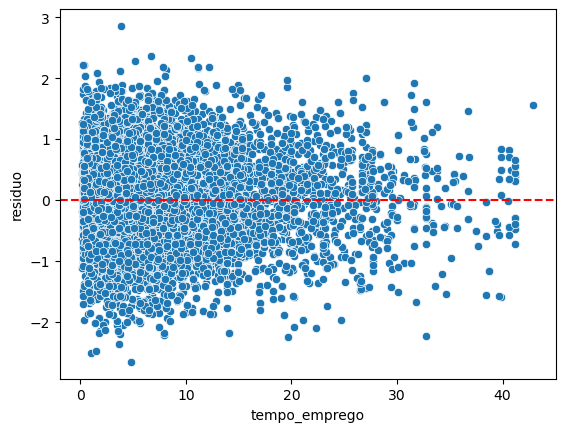

In [67]:
# análise de resíduos
prev_renda['residuo'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'residuo', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')